In [57]:
# set default image size
library(repr)
options(repr.plot.width=3, repr.plot.height=3)

In [12]:
install.packages("nycflights13")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(tidyverse)
library(nycflights13)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
# (y <- seq(1, 10, length.out = 5))

# dplyr Basics

- Pick observations by their values (filter()).
- Reorder the rows (arrange()).
- Pick variables by their names (select()).
- Create new variables with functions of existing variables (mutate()).
- Collapse many values down to a single summary (summa rize()).

## `filter()`

In [29]:
head(filter(flights, month == 1, day == 1), 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


In [32]:
head(filter(flights, month == 11 | month == 12), 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00


### `%in`

In [36]:
head(filter(flights, month %in% c(11, 12)),2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00


### missing values with `is.na(x)`

In [37]:
is.na(NA)

[1] TRUE

In [38]:
is.na(1)

[1] FALSE

### `near()`

In [27]:
sqrt(2)^2 == 2

[1] FALSE

In [28]:
near(sqrt(2) ^ 2, 2)

[1] TRUE

### `between()`

In [43]:
head(filter(flights, between(arr_time, 800,900)),2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


## `arrange()`

In [60]:
head(arrange(flights, year, month, day), 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


### `desc()`

In [65]:
?arrange

In [63]:
head(arrange(flights, desc(arr_delay)), 3)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00


### `order()`

## Exercises
1. How could you use arrange() to sort all missing values to the start? (Hint: use is.na().)

In [75]:
arrange(flights, desc(is.na(dep_time)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00
2013,1,2,NA,1355,NA,NA,1459,NA,EV,4434,N10575,EWR,MHT,NA,209,13,55,2013-01-02 13:00:00
2013,1,2,NA,1420,NA,NA,1644,NA,EV,4935,N759EV,EWR,ATL,NA,746,14,20,2013-01-02 14:00:00
2013,1,2,NA,1321,NA,NA,1536,NA,EV,3849,N13550,EWR,IND,NA,645,13,21,2013-01-02 13:00:00
2013,1,2,NA,1545,NA,NA,1910,NA,AA,133,NA,JFK,LAX,NA,2475,15,45,2013-01-02 15:00:00


2. Sort flights to find the most delayed flights. Find the flights that left earliest.

In [79]:
head(arrange(flights, desc(dep_delay)), 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00


In [84]:
# arrange(flights, order(dep_time, decreasing = FALSE))

3. Sort flights to find the fastest flights.

### `order()`

In [98]:
# sort by dep_time, increasing
head(flights[order(flights$dep_time, decreasing = FALSE),], 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,13,1,2249,72,108,2357,71,B6,22,N206JB,JFK,SYR,41,209,22,49,2013-01-13 22:00:00
2013,1,31,1,2100,181,124,2225,179,WN,530,N550WN,LGA,MDW,127,725,21,0,2013-01-31 21:00:00


# Select Columns with `select()`

- starts_with("abc") matches names that begin with “abc”. 
- ends_with("xyz") matches names that end with “xyz”.
- contains("ijk") matches names that contain “ijk”.
- matches("(.)\\1") selects variables that match a regular expression. This one matches any variables that contain repeated characters. You’ll learn more about regular expressions in Chapter 11.
- num_range("x", 1:3) matches x1, x2, and x3.

In [100]:
head(select(flights, year, month, day), 2)

year,month,day
2013,1,1
2013,1,1


### select all columns EXCEPT "year", "Day"

In [127]:
head(select(flights, -c("year","day")), 2)

month,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


### `rename()`

In [110]:
head(rename(flights, tail_num = tailnum), 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


### `everything()`

In [111]:
# move a couple of columns but keep the rest of the columns
head(select(flights, time_hour, air_time, everything()), 2)

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29


## Exercises

1. Brainstorm as many ways as possible to select dep_time, dep_delay, arr_time, and arr_delay from flights.

In [114]:
head(select(flights, c("dep_time", "dep_delay","arr_time","arr_delay")), 2)

dep_time,dep_delay,arr_time,arr_delay
517,2,830,11
533,4,850,20


2. What happens if you include the name of a variable multiple times in a select() call?

In [115]:
head(select(flights, c("dep_time", "dep_time","arr_time","arr_delay")), 2)

dep_time,arr_time,arr_delay
517,830,11
533,850,20


doesn't get used twice. 

3. What does the one_of() function do? Why might it be helpful in conjunction with this vector?
```
vars <- c(
"year", "month", "day", "dep_delay", "arr_delay"
)
```

**The helper should be read as: at least "one_of()" the variables will be shown.** 
*one_of allows for guessing or subset-matching*

`one_of()` is retired in favour of the more precise `any_of()` and `all_of()` selectors.

In [125]:
vars <- c("year", "month", "day", "dep_delay", "arr_delay", "garbage")
head(select(flights, one_of(vars)), 2)

Warning message:
“Unknown columns: `garbage`”

year,month,day,dep_delay,arr_delay
2013,1,1,2,11
2013,1,1,4,20


In [128]:
head(select(flights, contains("TIME")), 2)

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour
517,515,830,819,227,2013-01-01 05:00:00
533,529,850,830,227,2013-01-01 05:00:00


# Add New Variables with mutate()

add new columns that are functions of existing columns.

In [131]:
flights_sml <- select(
    flights, 
    year:day, 
    ends_with("delay"), 
    distance,
    air_time
) 

flights_sml  <- mutate(flights_sml,
    gain = arr_delay - dep_delay, 
    speed = distance / air_time * 60
)
head(flights_sml, 2)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
2013,1,1,2,11,1400,227,9,370.0441
2013,1,1,4,20,1416,227,16,374.2731


### if you only want to use the newly created columns, use `transmute()`

In [133]:
head(transmute(flights,
    gain = arr_delay - dep_delay, 
    hours = air_time / 60, 
    gain_per_hour = gain / hours
), 2)

gain,hours,gain_per_hour
9,3.783333,2.378855
16,3.783333,4.229075


# Useful Creation Functions

- `/` (decimal division)
- `%/%` (integer division)
- `%%` (remainder)
- `log(), log2(), log10()`
- `lead()` and `lag()` 
- `cumsum(), cumprod(), cummin(), cummax()`; and dplyr provides cummean()
    -  If you need rolling aggregates (i.e., a sum computed over a rolling window), try the RcppRoll package:
- `min_rank()`

## Exercises

1. Currently dep_time and sched_dep_time are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to a more convenient representation of number of minutes since midnight.

In [28]:
library(nycflights13)

In [29]:
flights <- mutate(flights,
    dep_hour = dep_time %/% 100,
    dep_minute = dep_time %% 100,
    dep_time = (dep_hour * 60) + dep_minute,
    sched_dep_time = ((sched_dep_time %/% 100) * 60) + (sched_dep_time %% 100)
)

In [31]:
head(select(flights, dep_time, sched_dep_time), 3)

dep_time,sched_dep_time
197,195
213,209
222,220


2. Compare air_time with arr_time - dep_time. What do you expect to see? What do you see? What do you need to do to fix it?

In [36]:
# library(nycflights13)

In [38]:
head(select(flights, air_time, arr_time, dep_time), 2)

air_time,arr_time,dep_time
227,830,197
227,850,213


In [41]:
?flights

In [42]:
head(select(mutate(flights,
    air_time_calculated = arr_time - dep_time,
), air_time, arr_time, dep_time, air_time_calculated), 3)

air_time,arr_time,dep_time,air_time_calculated
227,830,197,633
227,850,213,637
160,923,222,701


air_time is in minutes, and arr_time is still in HHMM format. Need to create a new column that is arr_time in minutes since midnight. 

In [43]:
flights <- mutate(flights,
    arr_time = ((arr_time %/% 100) * 60) + (arr_time %% 100)
)

In [44]:
head(select(mutate(flights,
    air_time_calculated = arr_time - dep_time,
), air_time, arr_time, dep_time, air_time_calculated), 3)

air_time,arr_time,dep_time,air_time_calculated
227,510,197,313
227,530,213,317
160,563,222,341


Oops that wasnt it lol. 

# Grouped Summaries with `summarize()`

Use `group_by()` with `summarize()` to calculate aggregate values grouped by column values.  

In [74]:
by_dest <- group_by(flights, dest) 
delay <- summarize(by_dest,
    count = n(),
    dist = mean(distance, na.rm = TRUE),
    delay = mean(arr_delay, na.rm = TRUE) 
)
delay <- filter(delay, count > 20, dest != "HNL")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


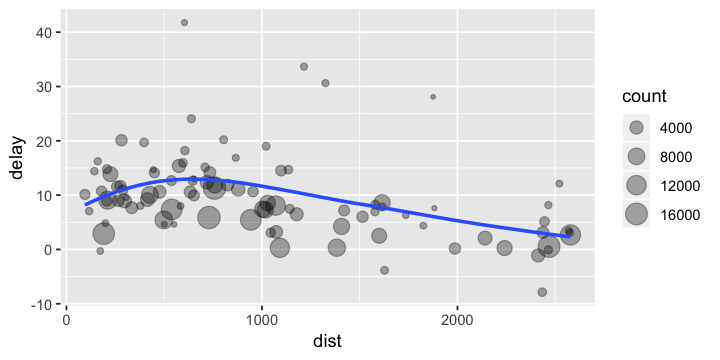

In [66]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data = delay, mapping = aes(x = dist, y = delay)) +
    geom_point(aes(size = count), alpha = 1/3) +
    geom_smooth(se = FALSE)

# Combining Multiple Operations with the Pipe

Behind the scenes, `x %>% f(y)` turns into `f(x, y)`

In [ ]:
delays <- flights %>% group_by(dest) %>% summarize(
count = n(),
    dist = mean(distance, na.rm = TRUE),
delay = mean(arr_delay, na.rm = TRUE) ) %>%
      filter(count > 20, dest != "HNL")


# Grouping by Multiple Variables

In [76]:
daily <- group_by(flights, year, month, day) 
head(per_day <-summarize(daily,flights=n()), 3)

year,month,day,flights
2013,1,1,842
2013,1,2,943
2013,1,3,914


In [77]:
head(per_month <- summarize(per_day, flights = sum(flights)), 3)

year,month,flights
2013,1,27004
2013,2,24951
2013,3,28834


## `ungroup()`

In [82]:
head(daily %>% ungroup(), 2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,dep_hour,dep_minute,dep_time_minutes_since_midnight,sched_dep_time_minutes_since_midnight
2013,1,1,197,195,2,510,819,11,UA,...,IAH,227,1400,5,15,2013-01-01 05:00:00,3,17,317,315
2013,1,1,213,209,4,530,830,20,UA,...,IAH,227,1416,5,29,2013-01-01 05:00:00,3,33,333,329


# Grouped Mutates (and Filters)

In [84]:
flights_sml <- select(flights, year:day, ends_with("delay"), distance, air_time) 

In [90]:
head(flights_sml %>% group_by(year, month, day) %>% filter(rank(desc(arr_delay)) < 10), 3)

year,month,day,dep_delay,arr_delay,distance,air_time
2013,1,1,853,851,184,41
2013,1,1,290,338,1134,213
2013,1,1,260,263,266,46
